In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [119]:
df = pd.read_csv('covid_19_india.csv')

In [120]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
Sno                         16850 non-null int64
Date                        16850 non-null object
Time                        16850 non-null object
State/UnionTerritory        16850 non-null object
ConfirmedIndianNational     16850 non-null object
ConfirmedForeignNational    16850 non-null object
Cured                       16850 non-null int64
Deaths                      16850 non-null int64
Confirmed                   16850 non-null int64
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [123]:
df.drop(columns=['Sno','Time'],axis=1,inplace=True)

In [126]:
df.head(1)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1


In [135]:
df.rename({'Cured':'Recovered'},axis=1,inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 7 columns):
Date                        16850 non-null object
State/UnionTerritory        16850 non-null object
ConfirmedIndianNational     16850 non-null object
ConfirmedForeignNational    16850 non-null object
Recovered                   16850 non-null int64
Deaths                      16850 non-null int64
Confirmed                   16850 non-null int64
dtypes: int64(3), object(4)
memory usage: 921.6+ KB


In [137]:
df.describe()

,Recovered,Deaths,Confirmed
count,1.685000e+04,16850.000000,1.685000e+04
mean,2.360353e+05,3485.222552,2.583667e+05
std,5.225438e+05,9330.541749,5.672808e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,2.658500e+03,22.000000,3.644750e+03
50%,2.889500e+04,453.000000,3.336150e+04
75%,2.537510e+05,3071.250000,2.666530e+05
max,5.872268e+06,123531.000000,6.113335e+06


In [143]:
df

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3
5,2020-02-04,Kerala,3,0,0,0,3
6,2020-02-05,Kerala,3,0,0,0,3
7,2020-02-06,Kerala,3,0,0,0,3
8,2020-02-07,Kerala,3,0,0,0,3
9,2020-02-08,Kerala,3,0,0,0,3


In [192]:
df2 = df.groupby(['Date','State/UnionTerritory'])[['Date','State/UnionTerritory','Recovered','Deaths','Confirmed']].sum().reset_index()

In [193]:
df2

,Date,State/UnionTerritory,Recovered,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [158]:
states = df2['State/UnionTerritory'].unique()

In [159]:
states

array(['Kerala', 'Delhi', 'Telengana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [160]:
len(states)

42

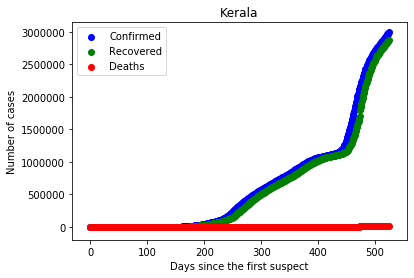

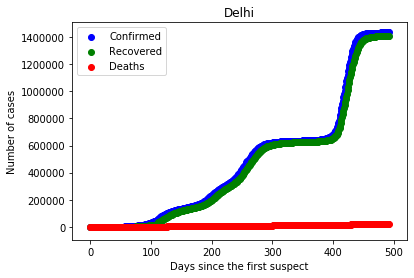

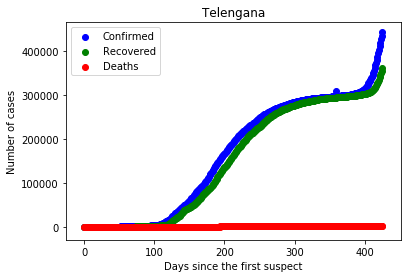

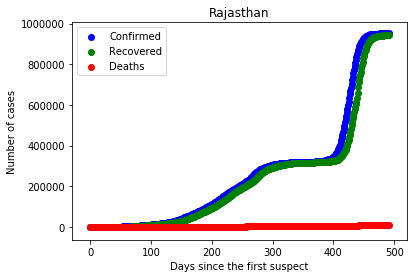

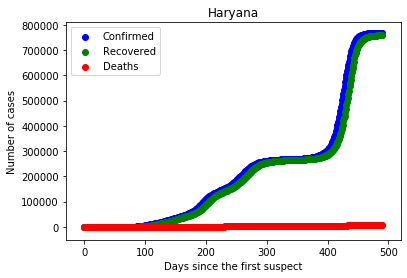

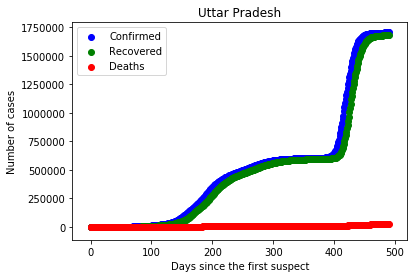

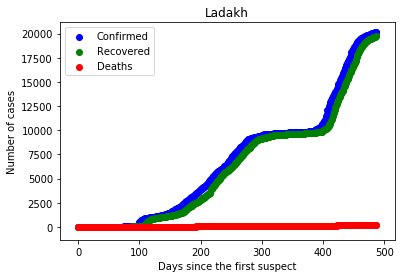

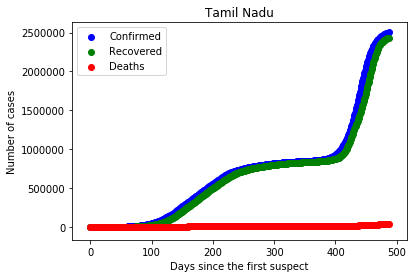

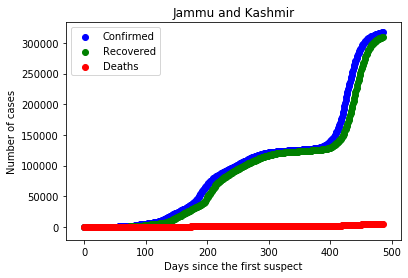

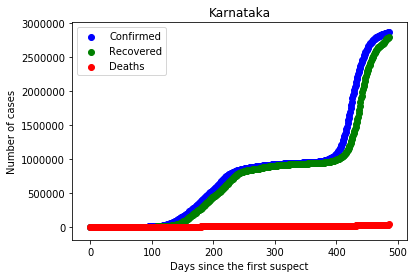

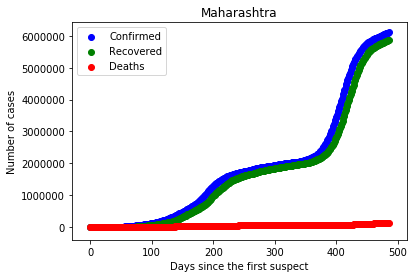

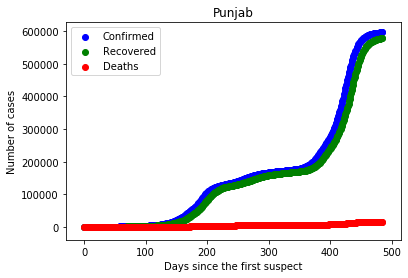

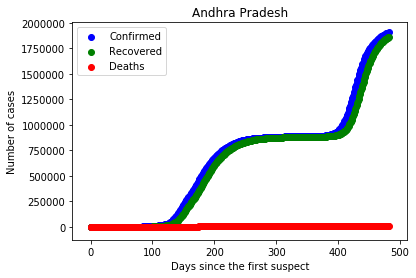

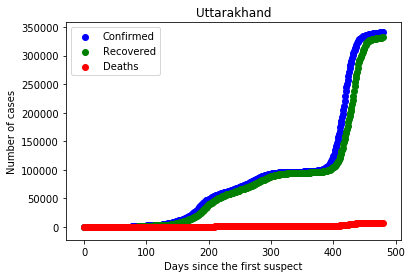

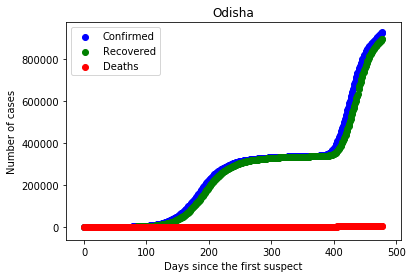

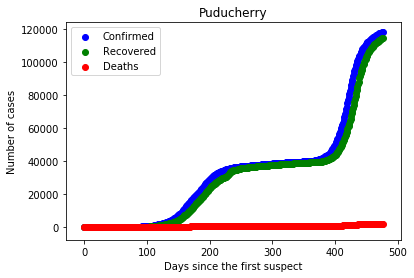

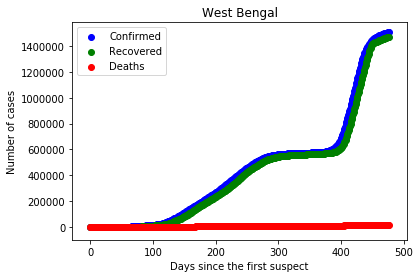

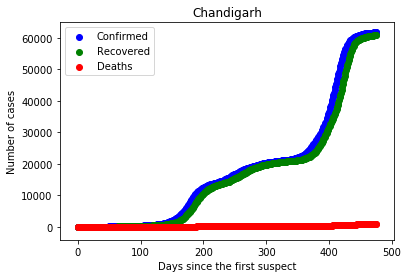

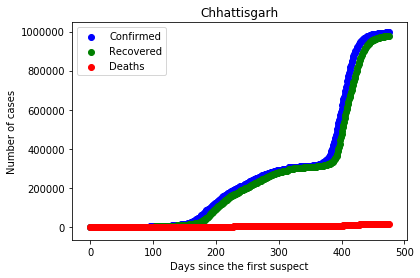

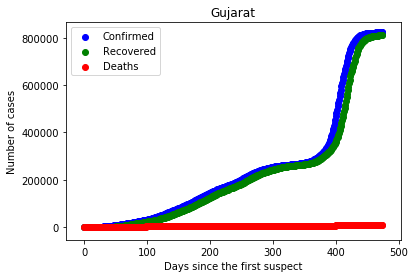

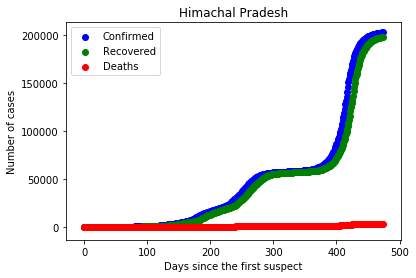

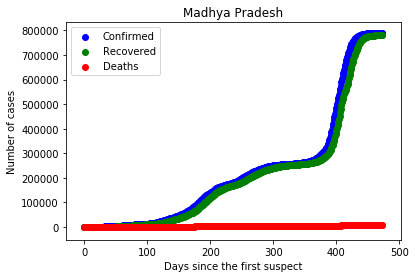

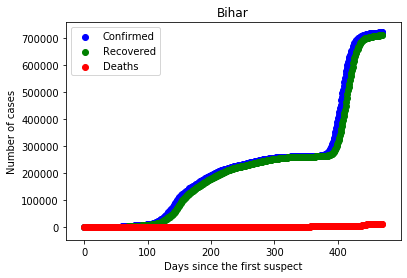

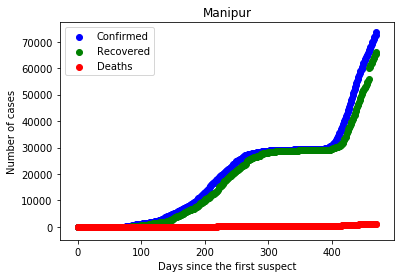

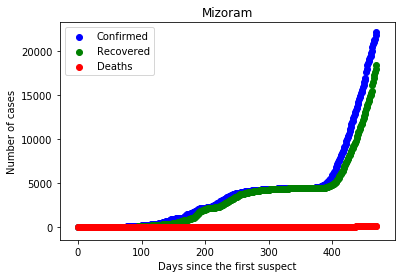

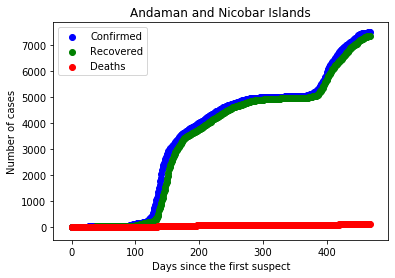

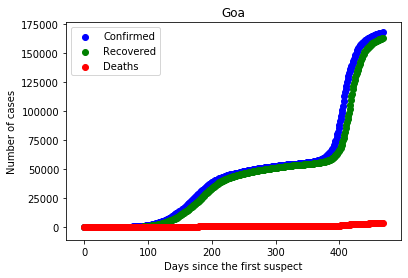

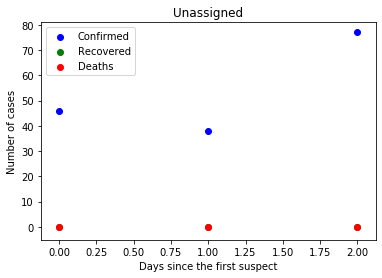

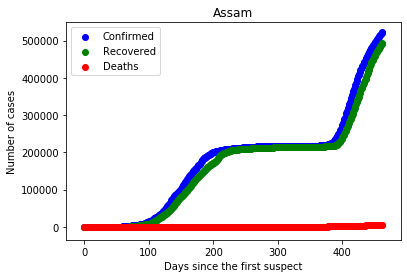

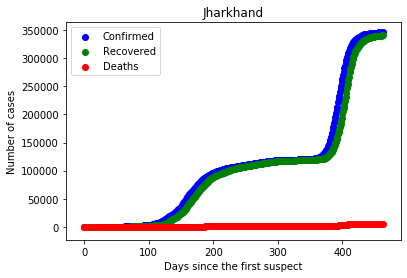

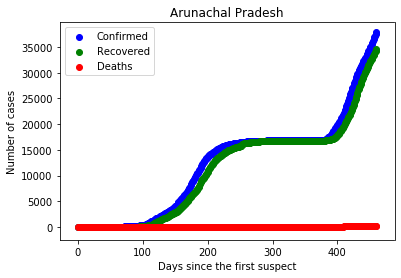

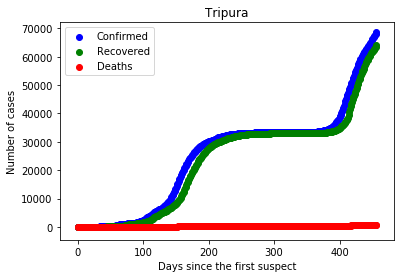

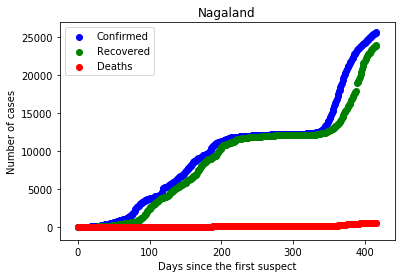

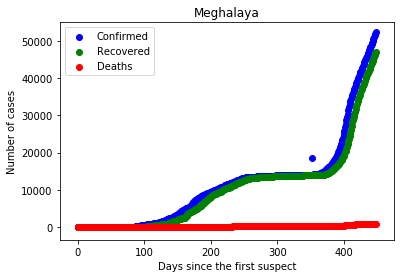

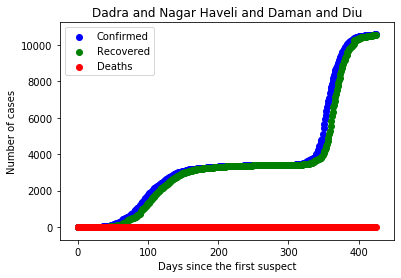

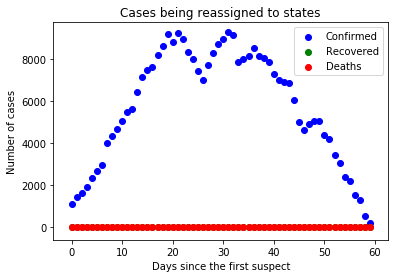

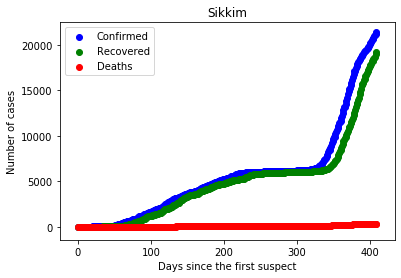

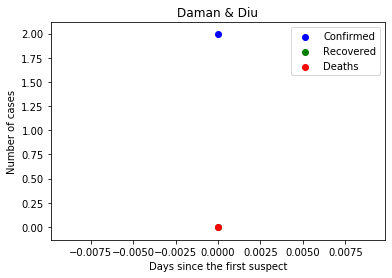

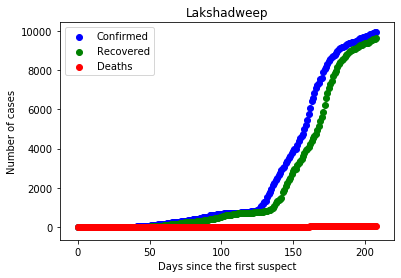

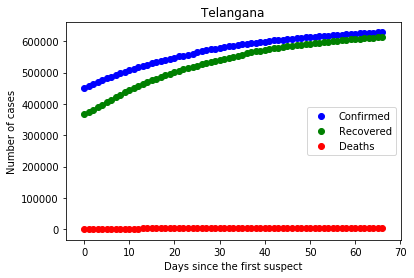

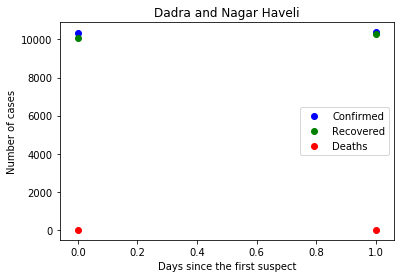

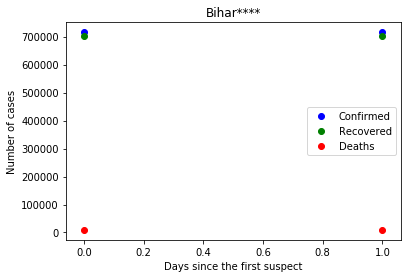

In [207]:
for idx in range(0,len(states)):
    c = df2[df2['State/UnionTerritory']==states[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(c)),c['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(c)),c['Deaths'],color='red',label='Deaths')
    plt.title(states[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()